# Business Understanding

This project analyzes what types of films Microsoft should create in their new movie studio using various movie data sets. Microsoft currently does not know anything about creating movies and they need help in deciding what films to create. Exploring movie data sets will tell what types of films are doing the best in the box office and this well help Microsoft decide on which creative direction they should go in to be successful. 

# Data Understanding

Each dataset used in this project contains thousands of entries. The datasets are from
 * [Box Office Mojo](https://www.boxofficemojo.com/)
 * [IMDB](https://www.imdb.com/)
 * [Rotten Tomatoes](https://www.rottentomatoes.com/)
 * [The Movie DB](https://www.themoviedb.org/)
 * [The Numbers](https://www.the-numbers.com/)

They contain data such as movie titles/release date/domestic and worldwide gross/popularity and genre to name a few. The data used in this research is suitable for the project because it contains various information that shows what movies are doing or have done the best in the box office.

# Data Preperation

In [1]:
import pandas as pd
import numpy as np
import sqlite3



In [2]:
# Loading the 'movie budgets' file.
movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col=0)

In [3]:
# Gathering information about the Data Frame.
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [4]:
# Previewing the first 5 rows
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# Converting the df to proper datetime format
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])

I was running into an issue converting strings to integers for dollar values. I searched the following in google: `converting dollars from str to integers pandas` and found this [solution](https://stackoverflow.com/a/32464612).

In [6]:
# Getting rid of the '$' and commas in 'gross' and 'budget' columns to convert the string to an integer.
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))


In [7]:
# Looking at the highest grossing movies worldwide
sorted_worldwide_gross_movie_budgets_df = movie_budgets_df.sort_values('worldwide_gross', ascending=False)

In [8]:
# Coverting release_date to proper dates
sorted_worldwide_gross_movie_budgets_df['release_date'] = pd.to_datetime(sorted_worldwide_gross_movie_budgets_df['release_date'])


In [9]:
sorted_worldwide_gross_movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279
43,1997-12-19,Titanic,200000000,659363944,2208208395
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
34,2015-06-12,Jurassic World,215000000,652270625,1648854864
...,...,...,...,...,...
75,2005-12-31,Insomnia Manica,500000,0,0
74,2012-07-17,Girls Gone Dead,500000,0,0
73,2012-04-03,Enter Nowhere,500000,0,0


In [10]:
v.head(30)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279
43,1997-12-19,Titanic,200000000,659363944,2208208395
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
34,2015-06-12,Jurassic World,215000000,652270625,1648854864
67,2015-04-03,Furious 7,190000000,353007020,1518722794
27,2012-05-04,The Avengers,225000000,623279547,1517935897
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
42,2018-02-16,Black Panther,200000000,700059566,1348258224


In [11]:
sorted_worldwide_gross_movie_budgets_df = sorted_worldwide_gross_movie_budgets_df.sort_values(by=['release_date', 'worldwide_gross'], ascending=False)

In [12]:
sorted_worldwide_gross_movie_budgets_df = sorted_worldwide_gross_movie_budgets_df.sort_values(by='release_date', ascending=False)

In [13]:
sorted_worldwide_gross_movie_budgets_df = sorted_worldwide_gross_movie_budgets_df.sort_values(by='worldwide_gross', ascending=False)

In [14]:
# Getting descriptive statistics on the sorted worldwide gross data set.
sorted_worldwide_gross_movie_budgets_df.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [15]:
sorted_worldwide_gross_movie_budgets_df[sorted_worldwide_gross_movie_budgets_df['release_date'].dt.year >= 2010].head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
34,2015-06-12,Jurassic World,215000000,652270625,1648854864
67,2015-04-03,Furious 7,190000000,353007020,1518722794
27,2012-05-04,The Avengers,225000000,623279547,1517935897
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
42,2018-02-16,Black Panther,200000000,700059566,1348258224
61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [16]:
# Loading the tmdb movies file.
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv.gz', index_col=0)

In [17]:
# Converting dates to actual dates.
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

In [18]:
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
# Gathering information about the Data Frame.
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [20]:
# Previewing the first 5 rows of the Data Frame.
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
# Sorting movies by most popular.
sorted_popularity_tmdb_movies_df = tmdb_movies_df.sort_values('popularity', ascending=False)

In [22]:
import ast

I was running into an issue the list to an actual python numeric list. I searched the following in google: `converting lists to numeric in pandas` and found this [solution](https://stackoverflow.com/questions/55144642/python-pandas-convert-list-of-objects-to-a-list-of-integer).

In [23]:
# Convert the string representation of the list to an actual Python list
sorted_popularity_tmdb_movies_df['genre_ids'] = sorted_popularity_tmdb_movies_df['genre_ids'].apply(ast.literal_eval)

# Convert the list to a numeric type
sorted_popularity_tmdb_movies_df['genre_ids'] = sorted_popularity_tmdb_movies_df['genre_ids'].apply(pd.to_numeric)

In [24]:
type(sorted_popularity_tmdb_movies_df['genre_ids'][0])

numpy.ndarray

In [25]:
# Looking at the top 30 most popular movies in the data set.
sorted_popularity_tmdb_movies_df.head(30)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [26]:
genre_popularity_df = sorted_popularity_tmdb_movies_df[['genre_ids', 'popularity']]


In [27]:
genre_popularity_df.head(30)

,genre_ids,popularity
23811,"[12, 28, 14]",80.773
11019,"[28, 53]",78.123
23812,"[28, 12, 16, 878, 35]",60.534
11020,"[28, 12, 14]",53.783
5179,"[878, 28, 12]",50.289
11021,"[28, 878, 12]",49.606
20617,"[878, 28, 53]",48.571
23813,"[878, 28, 53]",48.571
23814,[12],48.508
23815,"[10751, 16, 35, 14, 12]",48.057


In [28]:
# Loading the 'movie gross' file.
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz', index_col=0)

In [29]:
# Gatherting information about the Data Frame.
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [30]:
# Checking for how many missing values there are in each column. 
movie_gross_df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [31]:
# Because it is a small amount I decided to drop the missing values from the domestic_gross column
movie_gross_df.dropna(subset=['domestic_gross'], inplace=True)

In [32]:
# Checking to see if the missing values were dropped
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2009 non-null   object 
 3   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.2+ KB


In [33]:
# Previewing the first 5 rows in the Data Frame.
movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
# Sorting movies by the highest domestic gross
sorted_movie_gross_domestic_df = movie_gross_df.sort_values('domestic_gross', ascending=False)

In [35]:
# Viewing the top 30 results
sorted_movie_gross_domestic_df.head(30)

,studio,domestic_gross,foreign_gross,year
title,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
Black Panther,BV,700100000.0,646900000,2018
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
Jurassic World,Uni.,652300000.0,"1,019.4",2015
Marvel's The Avengers,BV,623400000.0,895500000,2012
Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
Incredibles 2,BV,608600000.0,634200000,2018
Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
Beauty and the Beast (2017),BV,504000000.0,759500000,2017


In [36]:
# Getting descriptive statistics on the sorted domestic movie gross data set.
sorted_movie_gross_domestic_df.describe()

,domestic_gross,year
count,3.359000e+03,3359.000000
mean,2.874585e+07,2013.968145
std,6.698250e+07,2.479432
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [37]:
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
imdb_tables = pd.read_sql('SELECT * FROM sqlite_master WHERE type = "table"', conn)
imdb_tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [38]:
# read in the movie_basics table into a dataframe
movie_basics = pd.read_sql_query("SELECT * from movie_basics", conn)

# read in the directors table into a dataframe
directors = pd.read_sql_query("SELECT * from directors", conn)


In [39]:
directors.drop_duplicates(subset=['movie_id'], keep='first', inplace=True)

In [40]:
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
7,tt0879859,nm2416460
...,...,...
291167,tt8999892,nm10122247
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242


In [41]:
# Merge the movie basics and directors tables on the movie_id column
movie_directors = pd.merge(movie_basics, directors, on='movie_id', how='left')


In [42]:
movie_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,nm9272490
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612


In [43]:
persons = pd.read_sql_query("SELECT * from persons", conn)

In [44]:
df_imdb = pd.read_sql('SELECT * FROM persons', conn)

In [45]:
# Merge the directors table with the persons table
directors_persons = pd.merge(directors, persons, on='person_id', how='inner')

# Merge the resulting dataframe with the movie basics table
movie_directors_df = pd.merge(movie_directors, directors_persons, on='person_id', how='left')

movie_directors_df

,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,person_id,movie_id_y,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,tt0063540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,tt0066787,Mani Kaul,1944.0,2011.0,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,tt0069049,Orson Welles,1915.0,1985.0,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,tt0069204,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,tt1928329,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...
380129,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,tt10225752,Angela Gurgel,NaN,NaN,"director,writer"
380130,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,tt9916754,Angela Gurgel,NaN,NaN,"director,writer"
380131,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,tt10231530,Angela Gurgel,NaN,NaN,"director,writer"
380132,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490,tt10056270,Angela Gurgel,NaN,NaN,"director,writer"


In [46]:
dir_name_title = movie_directors_df[['movie_id_x', 'primary_title', 'person_id', 'primary_name']]
dir_name_title

,movie_id_x,primary_title,person_id,primary_name
0,tt0063540,Sunghursh,nm0712540,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,nm0002411,Mani Kaul
2,tt0069049,The Other Side of the Wind,nm0000080,Orson Welles
3,tt0069204,Sabse Bada Sukh,nm0611531,Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,nm0765384,Valeria Sarmiento
...,...,...,...,...
380129,tt9916754,Chico Albuquerque - Revelações,nm9272490,Angela Gurgel
380130,tt9916754,Chico Albuquerque - Revelações,nm9272490,Angela Gurgel
380131,tt9916754,Chico Albuquerque - Revelações,nm9272490,Angela Gurgel
380132,tt9916754,Chico Albuquerque - Revelações,nm9272490,Angela Gurgel


In [47]:
budget_info = movie_budgets_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]
budget_info

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000,760507625,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Dark Phoenix,350000000,42762350,149762350
4,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
78,Red 11,7000,0,0
79,Following,6000,48482,240495
80,Return to the Land of Wonders,5000,1338,1338


In [48]:
budget_info.rename(columns={"movie": "primary_title"}, inplace=True)

/home/adam/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [49]:
budget_info

,primary_title,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000,760507625,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Dark Phoenix,350000000,42762350,149762350
4,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
78,Red 11,7000,0,0
79,Following,6000,48482,240495
80,Return to the Land of Wonders,5000,1338,1338


In [50]:
gross_directors_df = pd.merge(dir_name_title, budget_info, on='primary_title', how='inner')

In [51]:
gross_directors_df['profit'] = gross_directors_df['worldwide_gross'] - gross_directors_df['production_budget']
gross_directors_df

,movie_id_x,primary_title,person_id,primary_name,production_budget,domestic_gross,worldwide_gross,profit
0,tt0249516,Foodfight!,nm0440415,Lawrence Kasanoff,45000000,0,73706,-44926294
1,tt0249516,Foodfight!,nm0440415,Lawrence Kasanoff,45000000,0,73706,-44926294
2,tt0293429,Mortal Kombat,nm2585406,Simon McQuoid,20000000,70433227,122133227,102133227
3,tt0326592,The Overnight,nm1208371,Jed I. Goodman,200000,1109808,1165996,965996
4,tt3844362,The Overnight,nm2674307,Patrick Brice,200000,1109808,1165996,965996
...,...,...,...,...,...,...,...,...
10924,tt9844102,Ray,nm3386933,Riingo Banerjee,40000000,75305995,124823094,84823094
10925,tt9844102,Ray,nm3386933,Riingo Banerjee,40000000,75305995,124823094,84823094
10926,tt9844102,Ray,nm3386933,Riingo Banerjee,40000000,75305995,124823094,84823094
10927,tt9893078,Sublime,nm0349702,Bill Guttentag,1800000,0,0,-1800000


In [52]:
sorted_gross_directors_df = gross_directors_df.sort_values(by='worldwide_gross', ascending=False)

In [53]:
sorted_gross_directors_df.head(50)

,movie_id_x,primary_title,person_id,primary_name,production_budget,domestic_gross,worldwide_gross,profit
4972,tt1775309,Avatar,nm3786927,Atsushi Wada,425000000,760507625,2776345279,2351345279
4973,tt1775309,Avatar,nm3786927,Atsushi Wada,425000000,760507625,2776345279,2351345279
4974,tt1775309,Avatar,nm3786927,Atsushi Wada,425000000,760507625,2776345279,2351345279
7887,tt2495766,Titanic,nm4430776,Pete Meads,200000000,659363944,2208208395,2008208395
7888,tt8852130,Titanic,nm10047650,Ravi Punj,200000000,659363944,2208208395,2008208395
9621,tt4154756,Avengers: Infinity War,nm0751577,Anthony Russo,300000000,678815482,2048134200,1748134200
9622,tt4154756,Avengers: Infinity War,nm0751577,Anthony Russo,300000000,678815482,2048134200,1748134200
9625,tt4154756,Avengers: Infinity War,nm0751577,Anthony Russo,300000000,678815482,2048134200,1748134200
9623,tt4154756,Avengers: Infinity War,nm0751577,Anthony Russo,300000000,678815482,2048134200,1748134200
9624,tt4154756,Avengers: Infinity War,nm0751577,Anthony Russo,300000000,678815482,2048134200,1748134200


In [54]:
sorted_gross_directors_df.drop_duplicates(subset=['movie_id_x', 'person_id'], inplace=True)

In [55]:
sorted_gross_directors_df.head(60)

,movie_id_x,primary_title,person_id,primary_name,production_budget,domestic_gross,worldwide_gross,profit
4972,tt1775309,Avatar,nm3786927,Atsushi Wada,425000000,760507625,2776345279,2351345279
7887,tt2495766,Titanic,nm4430776,Pete Meads,200000000,659363944,2208208395,2008208395
7888,tt8852130,Titanic,nm10047650,Ravi Punj,200000000,659363944,2208208395,2008208395
9621,tt4154756,Avengers: Infinity War,nm0751577,Anthony Russo,300000000,678815482,2048134200,1748134200
31,tt0369610,Jurassic World,nm1119880,Colin Trevorrow,215000000,652270625,1648854864,1433854864
8347,tt2820852,Furious 7,nm1490123,James Wan,190000000,353007020,1518722794,1328722794
395,tt0848228,The Avengers,nm0923736,Joss Whedon,225000000,623279547,1517935897,1292935897
7712,tt2395427,Avengers: Age of Ultron,nm0923736,Joss Whedon,330600000,459005868,1403013963,1072413963
5227,tt1825683,Black Panther,nm3363032,Ryan Coogler,200000000,700059566,1348258224,1148258224
10014,tt4881806,Jurassic World: Fallen Kingdom,nm1291105,J.A. Bayona,170000000,417719760,1305772799,1135772799


In [56]:
directors_persons

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
3,tt0859635,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,tt0878654,nm0089502,Albert Pyun,1954.0,NaN,"director,writer,producer"
...,...,...,...,...,...,...
140411,tt8998302,nm10121510,Daryl Boman,NaN,NaN,"producer,director,writer"
140412,tt8999892,nm10122247,C. Damon Adcock,NaN,NaN,None
140413,tt8999974,nm10122357,Daysi Burbano,NaN,NaN,"director,writer,cinematographer"
140414,tt9001390,nm6711477,Bernard Lessa,NaN,NaN,"director,writer,cinematographer"


In [57]:
# Calling movie_directors df
len(movie_directors['primary_title'].unique())

136071

In [58]:
movie_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,nm9272490
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612


In [59]:
movie_basics = pd.read_sql_query("SELECT * from movie_basics", conn)

# read in the directors table into a dataframe
directors = pd.read_sql_query("SELECT * from directors", conn)

# join the two dataframes on the movie_id column
df = pd.merge(movie_basics, directors, on="movie_id")

# close the database connection
conn.close()

# view the resulting dataframe
print(df.head())

    movie_id                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0063540                        Sunghursh        Sunghursh        2013   
2  tt0063540                        Sunghursh        Sunghursh        2013   
3  tt0063540                        Sunghursh        Sunghursh        2013   
4  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes              genres  person_id  
0            175.0  Action,Crime,Drama  nm0712540  
1            175.0  Action,Crime,Drama  nm0712540  
2            175.0  Action,Crime,Drama  nm0712540  
3            175.0  Action,Crime,Drama  nm0712540  
4            114.0     Biography,Drama  nm0002411  


In [60]:
# Establish a connection to the database
conn = sqlite3.connect('data/im.db')

# Execute the SQL query to join the tables and convert the result set into a DataFrame
df_imdb = pd.read_sql_query('SELECT * FROM directors JOIN persons ON directors.person_id = persons.person_id', conn)

# Preview the first 10 rows of the DataFrame
print(df_imdb.head(10))

# Close the connection
conn.close()

    movie_id  person_id  person_id       primary_name  birth_year  death_year  \
0  tt0285252  nm0899854  nm0899854        Tony Vitale      1964.0         NaN   
1  tt0462036  nm1940585  nm1940585         Bill Haley         NaN         NaN   
2  tt0835418  nm0151540  nm0151540  Jay Chandrasekhar      1968.0         NaN   
3  tt0835418  nm0151540  nm0151540  Jay Chandrasekhar      1968.0         NaN   
4  tt0878654  nm0089502  nm0089502        Albert Pyun      1954.0         NaN   
5  tt0878654  nm2291498  nm2291498          Joe Baile         NaN         NaN   
6  tt0878654  nm2292011  nm2292011       Howie Askins         NaN         NaN   
7  tt0879859  nm2416460  nm2416460    Eric Manchester         NaN         NaN   
8  tt0996958  nm2286991  nm2286991      Tara Cardinal      1978.0         NaN   
9  tt0996958  nm2286991  nm2286991      Tara Cardinal      1978.0         NaN   

                    primary_profession  
0             producer,director,writer  
1             director,wri

In [61]:
# Establish a connection to the database
conn = sqlite3.connect('data/im.db')

# Execute the SQL query to join the tables and convert the result set into a DataFrame
df_imdb = pd.read_sql_query('SELECT * FROM directors JOIN movie_basics ON directors.movie_id = movie_basics.movie_id', conn)

# Preview the first 10 rows of the DataFrame
print(df_imdb.head(10))

# Close the connection
conn.close()


    movie_id  person_id   movie_id                    primary_title  \
0  tt0285252  nm0899854  tt0285252                   Life's a Beach   
1  tt0462036  nm1940585  tt0462036  Steve Phoenix: The Untold Story   
2  tt0835418  nm0151540  tt0835418                   The Babymakers   
3  tt0835418  nm0151540  tt0835418                   The Babymakers   
4  tt0878654  nm0089502  tt0878654                       Bulletface   
5  tt0878654  nm2291498  tt0878654                       Bulletface   
6  tt0878654  nm2292011  tt0878654                       Bulletface   
7  tt0879859  nm2416460  tt0879859                             Torn   
8  tt0996958  nm2286991  tt0996958         Legend of the Red Reaper   
9  tt0996958  nm2286991  tt0996958         Legend of the Red Reaper   

                    original_title  start_year  runtime_minutes  \
0                   Life's a Beach        2012            100.0   
1  Steve Phoenix: The Untold Story        2012            110.0   
2                

# Exploratory Data Analysis

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

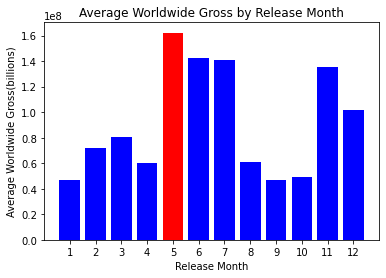

In [95]:
# Extract the month from the release date
sorted_worldwide_gross_movie_budgets_df['release_month'] = pd.DatetimeIndex(sorted_worldwide_gross_movie_budgets_df['release_date']).month

# Group the data by release month and calculate the average worldwide gross
grouped = sorted_worldwide_gross_movie_budgets_df.groupby('release_month')['worldwide_gross'].mean()

# Define a list of colors for each bin
colors = ['blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


# Create a histogram of the average worldwide gross by release month
plt.bar(grouped.index, grouped, color=colors)
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross(billions)')
plt.title('Average Worldwide Gross by Release Month')

# Set the tick locations and labels for the x-axis
plt.xticks(range(1, 13), range(1, 13))

plt.show()

In [63]:
genre_popularity_df = genre_popularity_df.explode('genre_ids').groupby('genre_ids')['popularity'].mean().reset_index()

# sort the genres by popularity in descending order
genre_popularity_df = genre_popularity_df.sort_values(by='popularity', ascending=False)

# select the top three genres by popularity
top_three_genres = genre_popularity_df['genre_ids'].head(3).tolist()

# print the top three genres
print(top_three_genres)


[12, 28, 14]


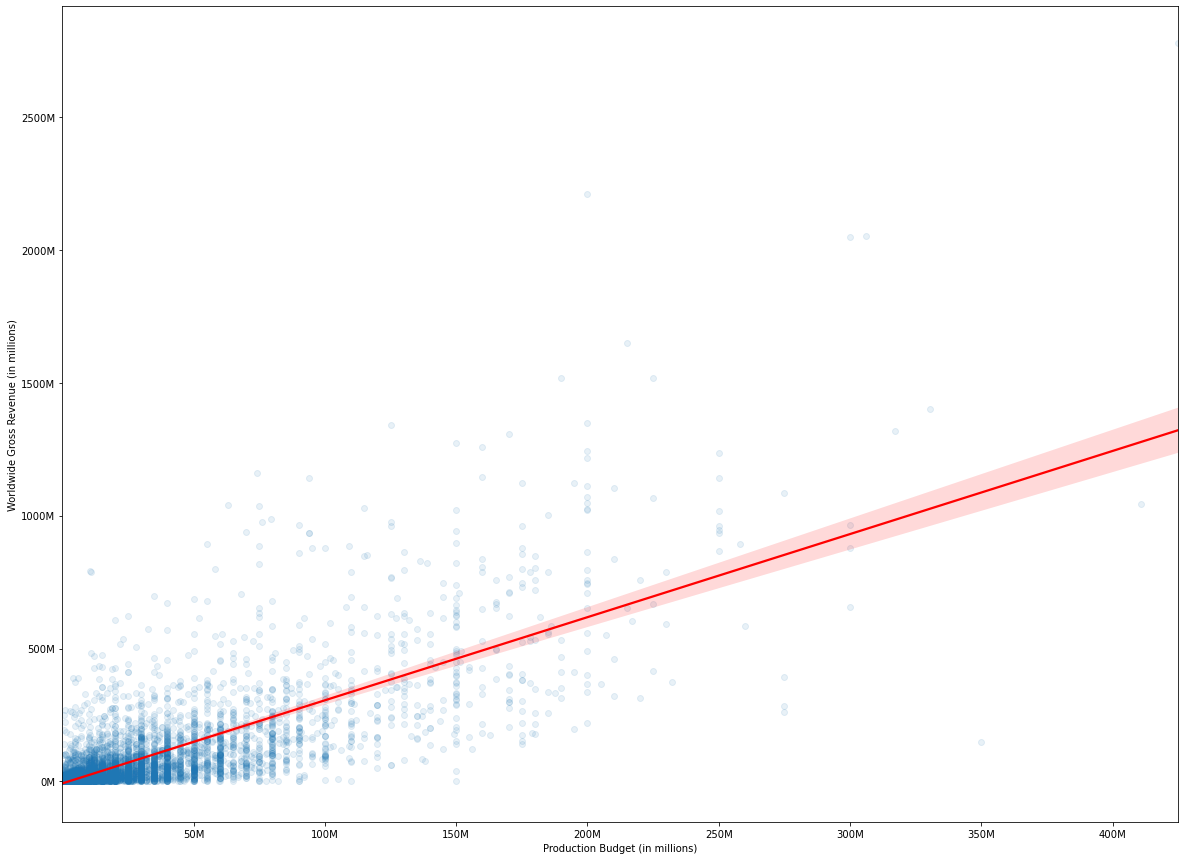

In [64]:
plt.figure(figsize = (20, 15))
plt.ticklabel_format(style='plain')
sns.regplot(
    data = sorted_worldwide_gross_movie_budgets_df, 
    x = "production_budget", 
    y = "worldwide_gross",
    scatter_kws = {"alpha": 0.1},
    line_kws = {"color": "red"}
)
plt.savefig("budget_wgross.jpg")

plt.xlabel('Production Budget (in millions)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter
        (lambda x, pos: f'{x/1000000:.0f}M'))

# Set the y-axis label and format the tick labels in millions
plt.ylabel('Worldwide Gross Revenue (in millions)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter
        (lambda x, pos: f'{x/1000000:.0f}M'))

plt.savefig("budget_wgross.jpg")

Text(0, 0.5, 'Frequency')

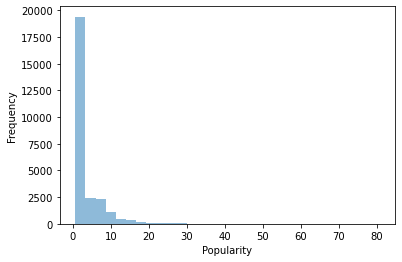

In [65]:
# Graphing descriptive statistics for the data frame (histogram)
ax = sorted_popularity_tmdb_movies_df["popularity"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")


Text(0, 0.5, 'Frequency')

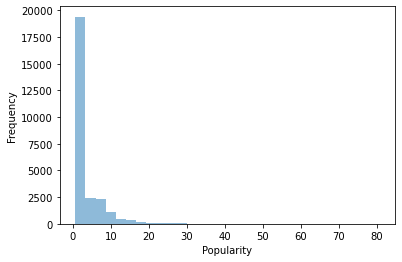

In [66]:
# Graphing descriptive statistics for the data frame (histogram) Left skewed
ax = sorted_popularity_tmdb_movies_df["popularity"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")


Text(17.200000000000003, 0.5, 'Frequency')

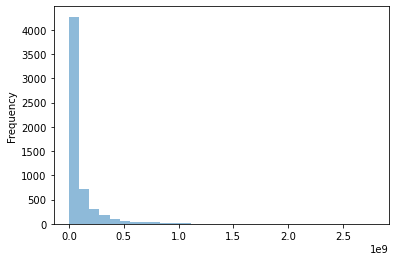

In [67]:
# Graphing descriptive statistics for the data frame (histogram) Left skewed
sorted_worldwide_gross_movie_budgets_df["worldwide_gross"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("worldwide_gross")
ax.set_ylabel("Frequency")

Text(17.200000000000003, 0.5, 'Frequency')

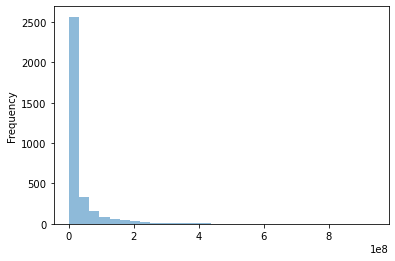

In [68]:
# Graphing descriptive statistics for the data frame (histogram) Left skewed
sorted_movie_gross_domestic_df["domestic_gross"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("domestic_gross")
ax.set_ylabel("Frequency")

We can see that the relationship between popularity and vote average is fairly normally distributed, as well as vote count and vote average. 

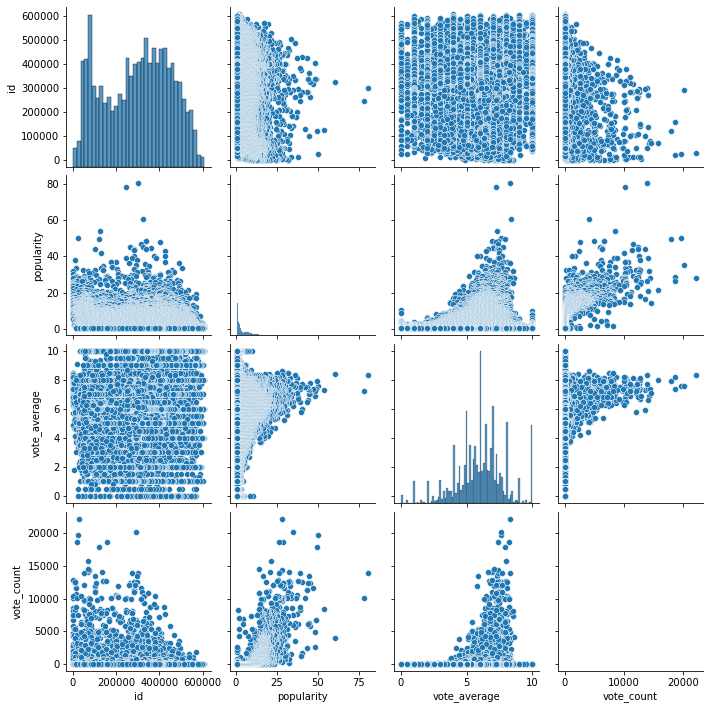

In [69]:
sns.pairplot(sorted_popularity_tmdb_movies_df)

In general we can see below that there is a positive correlation between production budget and domestic and worldwide gross of a movie.

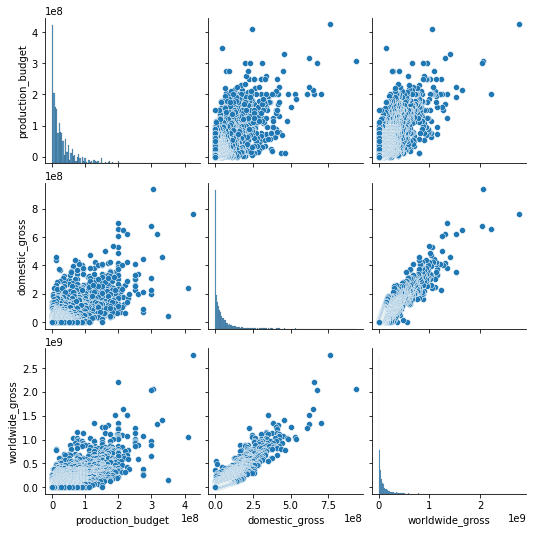

In [70]:
sns.pairplot(sorted_worldwide_gross_movie_budgets_df)

In [71]:
pd.options.display.float_format = '{:.2f}'.format


<ipython-input-72-f4e8bc5e8174>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies['genre_ids'] = top_movies['genre_ids'].replace({12: 'Adventure', 28: 'Action'})


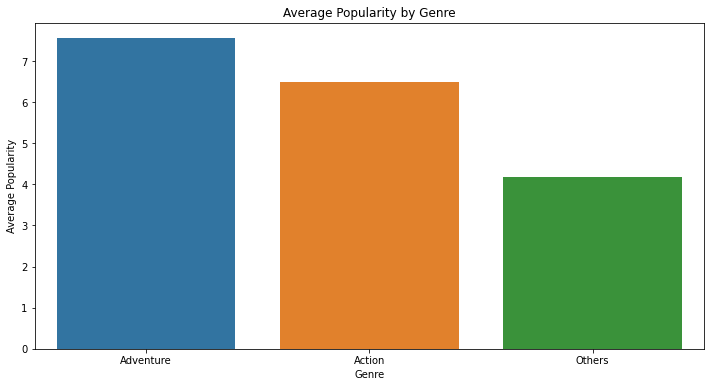

In [72]:
others_popularity = genre_popularity_df[~genre_popularity_df['genre_ids'].isin([12, 28])]['popularity'].mean()
others = pd.DataFrame({'genre_ids': ['Others'], 'popularity': [others_popularity]})

top_movies = genre_popularity_df[genre_popularity_df['genre_ids'].isin([12, 28])]
top_movies['genre_ids'] = top_movies['genre_ids'].replace({12: 'Adventure', 28: 'Action'})
top_movies = pd.concat([top_movies, others])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_movies, x='genre_ids', y='popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()

# Conclusion

Through my analysis I found that the most popular movies in the box office over the past 10 years have been in the genre's of "Action" and "Adventure".

In general there is a positive correlation between production budget and worldwide/domestic gross. 

On average the highest grossing movies have been released in the month of May. 

## Recommendations

Based on my findings I would recommend that Microsoft should create movies that are within the "Action" and "Adventure" genres as they have the highest popularity rating. 

I would recommend that Microsoft be prepared to investment more money into the production budget. Higher production budgets are more likely to lead to a higher grossing film. 

Releasing a movie in one of these 3 months: May,June,July. Which have shown to produce the highest grossing films on average. 

## Limitations

One limitation that I found while investigating the data sets was that there were too many missing values in certain data sets which effected my ability to use it. The biggest limitation was the lack of information on net profit for production companies. Having this information would help in determining a movie's a success. Looking into how much money went into advertising for example could be an element that would effect total profit. Having numbers on production budget and worldwide gross are very valuable but it still does not tell the whole story. 

## Next Steps

Exploring more data sets is always helpful. The more information we have at our fingertips will only strenghten knowledge on a particular subject and lead to the best course of action. I would look into data sets focusing more on production companies to try and gather more information on what goes into making a successful film. Looking at data sets that have information on how much money went into advertising and also how long the movie was actively advertised for would be crucial to look at to ensure the best steps are being taken to produce a successful movie. Also looking at merchandising sales for a movie would be another helpful factor in determining success.